In [1]:
import os 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Load Data

In [2]:
path = '../data/processed'
df = pd.read_pickle(os.path.join(path,'transactions.pkl'))
articles = pd.read_csv('../data/raw/articles.csv')
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,2,0663713001,0.0508,2
1,2018-09-20,2,0541518023,0.0305,2
2,2018-09-20,7,0505221004,0.0152,2
3,2018-09-20,7,0685687003,0.0169,2
4,2018-09-20,7,0685687004,0.0169,2


## To-Do List
- Histogram of purchase per transactions
- Repurchase Duration
- Find recency
- Ratio of Inactive Customers

### Histogram of purchase per transactions

In [3]:
temp = df[['t_dat','customer_id','article_id','price','sales_channel_id']]
temp = temp.groupby(['t_dat','customer_id','sales_channel_id']).agg({'article_id':'count','price':sum})

temp.head()

article_id  price
t_dat      customer_id sales_channel_id                   
2018-09-20 2           2                          2 0.0813
           7           2                          5 0.0864
           198         1                          4 0.1448
                       2                          1 0.0457
           203         2                          2 0.0428

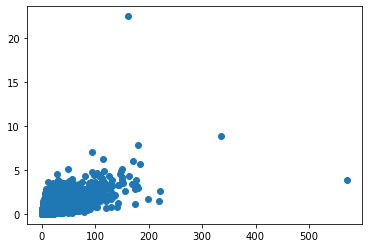

In [4]:
plt.scatter(temp['article_id'],temp['price'])
plt.show()

In [5]:
# from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor(n_neighbors=30, metric='euclidean')
# cluster = lof.fit_predict(temp)
# cluster

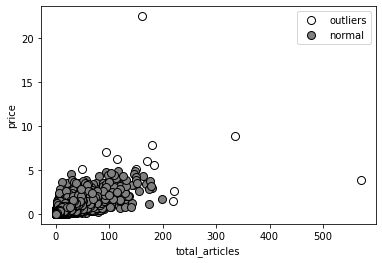

In [6]:
temp['cluster'] = np.where((temp['article_id']>200)|(temp['price']>5), 0, 1)
colors = ['white','grey']
fig = plt.figure()
leg = {0:'outliers',1:'normal'}
for i in range(2):
    plt.plot(temp.loc[temp['cluster']==i, 'article_id'], temp.loc[temp['cluster']==i, 'price'], 'o', mfc=colors[i], ms=8, mec='k', label = leg[i])
plt.xlabel('total_articles')
plt.ylabel('price')
plt.legend()

In [7]:
temp.article_id.describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count   9174457.0000
mean          3.4649
std           3.5898
min           1.0000
10%           1.0000
25%           1.0000
50%           2.0000
75%           4.0000
99%          18.0000
max         570.0000
Name: article_id, dtype: float64

In [8]:
temp[temp.article_id >200]

,,,article_id,price,cluster
t_dat,customer_id,sales_channel_id,,,
2018-10-14,1114704,1,570,3.8567,0
2018-10-15,195309,2,220,1.5238,0
2018-12-17,1044421,2,336,8.8435,0
2019-01-13,530195,2,221,2.5878,0


In [9]:
# df[(df.customer_id==1114704)฿].drop_duplicates(subset=['t_dat','customer_id'])

We may romove those transactions that have over 200 articles.

### Repurchase Duration

In [11]:
temp = df[['t_dat','customer_id']].drop_duplicates(subset=['t_dat','customer_id'])\
            .sort_values(by=['customer_id','t_dat'])\
            .reset_index(drop=True)
temp['Repurchase_duration'] = temp.groupby('customer_id')['t_dat'].diff() / np.timedelta64(1, 'D')
temp['Repurchase_duration'] = temp['Repurchase_duration'].fillna(0)
temp['target_period'] = np.where(temp['t_dat']>'2020-09-15',1,0)
temp.head()

,t_dat,customer_id,Repurchase_duration,target_period
0,2018-12-27,0,0.0000,0
1,2019-05-02,0,126.0000,0
2,2019-05-25,0,23.0000,0
3,2019-07-25,0,61.0000,0
4,2019-09-18,0,55.0000,0


In [20]:
temp['Repurchase_duration'][temp['target_period']==1].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])

count   77143.0000
mean       59.4266
std       100.6466
min         0.0000
10%         1.0000
25%         6.0000
50%        22.0000
75%        65.0000
90%       155.0000
95%       270.0000
max       731.0000
Name: Repurchase_duration, dtype: float64

<AxesSubplot:>

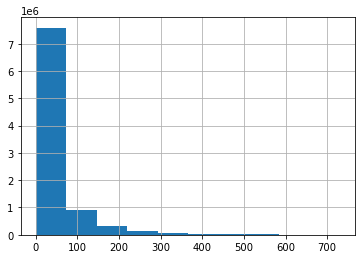

In [13]:
temp['Repurchase_duration'].hist()

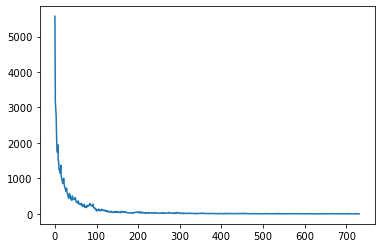

In [19]:
test = temp.groupby(['Repurchase_duration']).agg({'target_period':'sum'}).reset_index().sort_values(by=['Repurchase_duration'])
plt.plot(test.target_period)

### Channel Ratio

In [ ]:
df.sales_channel_id.value_counts(normalize=True)

### Multiple channel transaction

In [ ]:
df.groupby(['t_dat','customer_id']).agg({'sales_channel_id':'nunique'}).sort_values(by='sales_channel_id',ascending=False)

### Ratio of Inactive Customers

In [ ]:
articles.head(2)

In [ ]:
df.groupby('sales_channel_id').agg({'t_dat':'count'})

In [ ]:
df.sales_channel_id.value_counts(normalize=True)